In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [13]:
# original
tf.set_random_seed(123)
filename_queue = tf.train.string_input_producer(['./data/HousePrice_preprocessed_df2_wSalePrice.csv'], 
                                                shuffle=False, name='filename_queue')
key, value = tf.TextLineReader(skip_header_lines=1).read(filename_queue)
record_defaults = [[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],
                  [0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],
                  [0.], [0.],[0.], [0.],[0.], [0.],[0.]] # 27칸
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[15:-1], xy[-1:]], batch_size=50)

X = tf.placeholder(tf.float32, shape=[None, 11])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([11,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000001)
train = optimizer.minimize(cost)

In [25]:
# X = SalePrice
tf.set_random_seed(123)
filename_queue = tf.train.string_input_producer(['./data/HousePrice_preprocessed_df2_wSalePrice_test4.csv'], 
                                                shuffle=False, name='filename_queue')
key, value = tf.TextLineReader(skip_header_lines=1).read(filename_queue)
record_defaults = [[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],
                  [0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],
                  [0.], [0.],[0.], [0.],[0.], [0.],[0.]] # 27칸
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[-1:], xy[-1:]], batch_size=100)

X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([1,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(cost)

In [62]:
# X = GrLivArea
tf.set_random_seed(123)
filename_queue = tf.train.string_input_producer(['./data/HousePrice_preprocessed_df2_wSalePrice_test4.csv'], 
                                                shuffle=False, name='filename_queue')
key, value = tf.TextLineReader(skip_header_lines=1).read(filename_queue)
record_defaults = [[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],
                  [0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],[0.], [0.],
                  [0.], [0.],[0.], [0.],[0.], [0.],[0.]] # 27칸
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = tf.train.batch([xy[15:19], xy[-1:]], batch_size=100)

X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4,1], name = 'weight'))
b = tf.Variable(tf.random_normal([1], name='bias'))

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0003)
train = optimizer.minimize(cost)

In [63]:
# sess = tf.Session()
# print(sess.run(xy[-1:]))

In [64]:
with tf.Session() as sess:
# sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    # sess.run(tf.local_variables_initializer())
    # print(sess.run(W), sess.run(b))

    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    Step_val = []
    W_val = []
    Hy_val = []
    Cost_val = []

    for step in tqdm_notebook(range(5001)):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                       feed_dict={X: x_batch,
                                                  Y: y_batch})
        W_val.append(sess.run(W))
        Step_val.append(step)
        Hy_val.append(hy_val[0])
        Cost_val.append(cost_val)
        

        if step % 50 == 0 or step < 10:            
            print('step {}: \nhy_val: {}, \ncost_val: {}'.format(step, hy_val[0], cost_val))
    
    coord.request_stop()
    coord.join(threads)

step 0: 
hy_val: [2.1489832], 
cost_val: 353.7154541015625
step 1: 
hy_val: [0.8704294], 
cost_val: 411.63201904296875
step 2: 
hy_val: [-2.1680632], 
cost_val: 379.61151123046875
step 3: 
hy_val: [0.5994284], 
cost_val: 405.0511474609375
step 4: 
hy_val: [0.560318], 
cost_val: 388.1553649902344
step 5: 
hy_val: [-1.2767434], 
cost_val: 387.2900390625
step 6: 
hy_val: [2.428354], 
cost_val: 434.1282043457031
step 7: 
hy_val: [1.143888], 
cost_val: 415.603271484375
step 8: 
hy_val: [2.5477333], 
cost_val: 376.880859375
step 9: 
hy_val: [-2.3996706], 
cost_val: 342.857421875
step 50: 
hy_val: [0.44011953], 
cost_val: 406.8497009277344
step 100: 
hy_val: [3.6023555], 
cost_val: 342.85333251953125
step 150: 
hy_val: [1.878892], 
cost_val: 332.6494445800781
step 200: 
hy_val: [1.9984283], 
cost_val: 287.6964416503906
step 250: 
hy_val: [1.9855599], 
cost_val: 304.8260498046875
step 300: 
hy_val: [6.2185006], 
cost_val: 278.935546875
step 350: 
hy_val: [2.5580604], 
cost_val: 259.20596313476

,0
0,10.192570
1,15.817818
2,17.023430
3,20.755184
4,18.987295


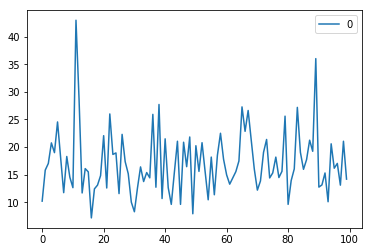

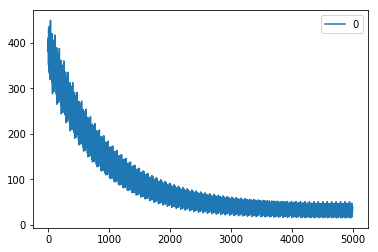

In [65]:
# W_df = pd.DataFrame(W_val)
Hy_df = pd.DataFrame(hy_val)
Cost_df = pd.DataFrame(Cost_val)
# W_df.plot()
Hy_df.plot()
Cost_df.plot()
Hy_df.head()